In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.notebook import tqdm

In [207]:
df_draft = pd.read_csv('data_banknote_authentication.txt', names=['variance', 'skewness', 'curtosis', 'entropy', 'class'],
                header=None)
df_draft.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Normalizing Data in order to have a unit variance features

In [208]:
def normalize_feats(train_features, some_features):
    """
    Normalizes the sample data features.
    
    Parameters
    ----------
    train_features: A numpy array with the shape (N_train, d), where d is the number of features and N_train is the number of training samples.
    some_features: A numpy array with the shape (N_some, d), where d is the number of features and N_some is the number of samples to be normalized.
    
    Returns
    -------
    some_features_normalized: A numpy array with shape (N_some, d).
    """
    
    # your code here
#     raise NotImplementedError
    
    m = train_features.mean(axis=0)
    s = train_features.std(axis=0)
    some_features_normalized = (some_features - m) / s
    
    return some_features_normalized

In [209]:
# Performing sanity checks on implementation
X_train = (np.arange(35).reshape(5,7) ** 13) % 20
X_some = np.arange(7).reshape(1,7) * 10
X_norm_some = normalize_feats(X_train, X_some)
assert np.array_equal(X_norm_some.round(3), np.array([[-1.265,  0.04 ,  2.298,  3.24 ,  9.247,  6.798,  8.056]]))

To start computing the stochastic gradient descent (SGD) of the SVM classifier we have:

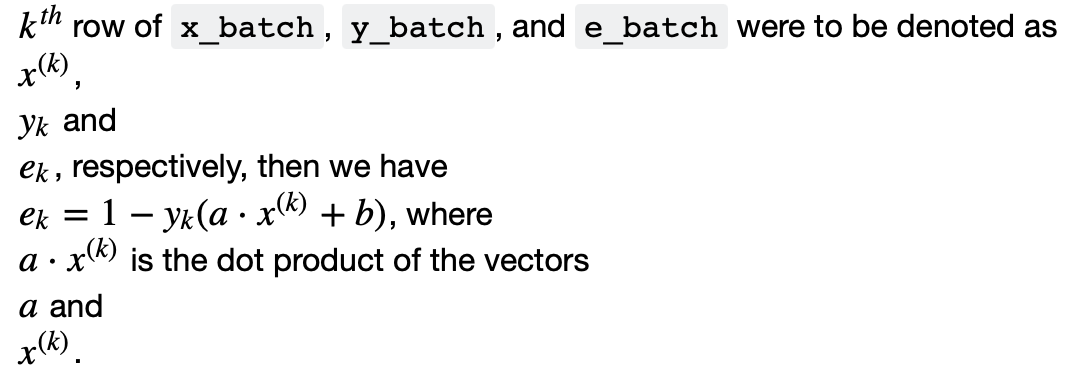

In [210]:
def e_term(x_batch, y_batch, a, b):
    """
    Computes the margin of the data points.
    
    Parameters
    ----------
    x_batch: A numpy array with the shape (N, d), where d is the number of features and N is the batch size.
    y_batch: A numpy array with the shape (N, 1), where N is the batch size.
    a: A numpy array with the shape (d, 1), where d is the number of features. This is the weight vector.
    b: A scalar.
    
    Returns
    -------
    e_batch: A numpy array with shape (N, 1). 
    """
    
    # your code here
#     raise NotImplementedError
    
    """
    x = N * d
    y =   * d
    a =   * d * 1
    b = 1
    ---------------
    
      = N * d * 1
    """
    
    e_batch = 1-y_batch*((x_batch @ a + b))

    # https://stackoverflow.com/questions/21562986/numpy-matrix-vector-multiplication
    
#     print(e_batch.shape)
    
    return e_batch

In [211]:
# Performing sanity checks on implementation
x_batch_ = ((np.arange(35).reshape(5,7) ** 13) % 20) / 7.
y_batch_ = (2. * (np.arange(5)>2) - 1.).reshape(-1,1)
a_ = (np.arange(7)* 0.2).reshape(-1,1)
b_ = 0.1
e_batch_ = e_term(x_batch_, y_batch_, a_, b_)

assert np.array_equal(e_batch_.round(3), np.array([[ 5.986],[ 7.043],[ 7.529],[-4.014],[-1.7  ]]))

We can compute the Hinge and Ridge regularization losses following the below mathematical equations

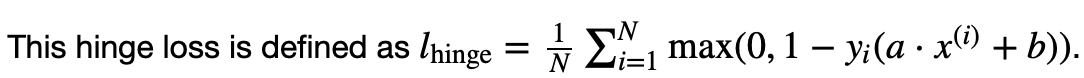
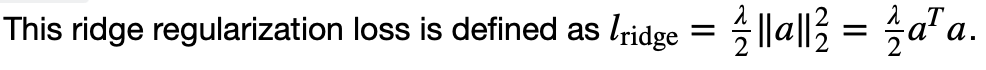

In [212]:
def loss_terms_ridge(e_batch, a, lam):
    """
    Computes the hinge and ridge regularization losses.
    
    Parameters
    ----------
    e_batch: A numpy array with the shape (N, 1), where N is the batch size. This is the output of the e_term function you wrote previously, and its kth element is e_k = 1 − y_k(a*x_k+b).
    a: A numpy array with the shape (d, 1), where d is the number of features. This is the weight vector.
    lam: A scalar representing the regularization coefficient 𝜆.
    
    Returns
    -------
    hinge_loss: The hinge regularization loss defined in the above cell.
    ridge_loss: The ridge regularization loss defined in the above cell.
    """
    
    """
    e_batch = N * 1
    a       =     d * 1
    lam     = 1
    ---------------------
              N * d * 1
              
    """
    
    hinge_loss = e_batch
    hinge_loss[hinge_loss < 0] = 0
    hinge_loss = hinge_loss.mean()
    
    ridge_loss = (lam / 2) * np.linalg.norm(a)**2

    return np.array((hinge_loss, ridge_loss))

In [213]:
# Performing sanity checks on implementation
e_batch_ = ((np.arange(35).reshape(-1,1) ** 13) % 20) / 7.
a_ = (np.arange(7)* 0.2).reshape(-1,1)
lam_ = 10.

hinge_loss_1, reg_loss_1 = tuple(loss_terms_ridge(e_batch_, a_, lam_))
assert np.round(hinge_loss_1,3) == 1.114 and np.round(reg_loss_1,3) == 18.2

hinge_loss_2, reg_loss_2 = tuple(loss_terms_ridge(e_batch_-1., a_, lam_))
assert np.round(hinge_loss_2,3) == 0.412 and np.round(reg_loss_2,3) == 18.2

In order to compute the ridge regularized loss gradient with respect to the weights vector, solving the below mathematical equation is needed through the partial derivative with respect to a, the weight vector.

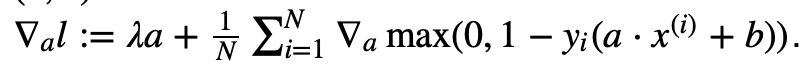

In [214]:
def a_gradient_ridge(x_batch, y_batch, e_batch, a, lam):
    """
    Computes the ridge_regularized loss gradient w.r.t the weights vector.
    
    Parameters
    ----------
    x_batch: A numpy array with the shape (N, d), where d is the number of features and N is the batch size.
    y_batch: A numpy array with the shape (N, 1), where N is the batch size.
    e_batch: A numpy array with the shape (N, 1), where N is the batch size. This is the output of the e_term function you wrote previously, and its kth element is e_k = 1 − y_k(a*x_k+b).
    a: A numpy array with the shape (d, 1), where d is the number of features. This is the weight vector.
    lam: A scalar representing the regularization coefficient 𝜆.
    
    Returns
    -------
    grad_a: A numpy array with shape (d, 1) and defined as the gradient of the ridge regularized loss function. 
    """
    
    # your code here
#     raise NotImplementedError
    
    """
    x = N * d
    y = N * 1
    e = N * 1
    a =   * d * 1
    l = 1
    ---------------
      = N * d * 1
    
    """
    N, d = x_batch.shape
    
    par_der = np.where(e_batch > 0, -y_batch * x_batch, np.zeros((N,d))) # partial derivative wrt a
    par_der = par_der.mean(axis=0)[:,np.newaxis]
    
    grad_a = (lam * a) + par_der 
    
    return grad_a

In [215]:
# Performing sanity checks on implementation
x_batch_ = ((np.arange(35).reshape(5,7) ** 13) % 20) / 7.
y_batch_ = (2. * (np.arange(5)>2) - 1.).reshape(-1,1)
a_ = (np.arange(7)* 0.2).reshape(-1,1)
b_ = 0.1
lam_ = 10.
e_batch_ = e_term(x_batch_, y_batch_, a_, b_)

grad_a_ = a_gradient_ridge(x_batch_, y_batch_, e_batch_, a_, lam_)

assert np.array_equal(grad_a_.round(3), np.array([[ 0.314],[ 2.686],[ 5.057],[ 6.571],[ 8.657],[11.029],[12.829]]))

To compute the derivative of the cost function, the gradient is defined as follows:

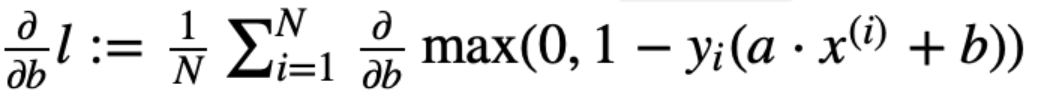

In [216]:
def b_derivative(y_batch, e_batch):
    """
    Computes the loss gradient with respect to the bias parameter b.
    
    Parameters
    ----------
    y_batch: A numpy array with the shape (N, 1), where N is the batch size.
    e_batch: A numpy array with the shape (N, 1), where N is the batch size. This is the output of the e_term function you wrote previously, and its kth element is e_k = 1 − y_k(a*x_k+b).
    
    Returns
    -------
    der_b: A scalar defined as the gradient of the hinge loss w.r.t the bias parameter b.
    """
    
    # your code here
#     raise NotImplementedError
    
    """
   y = N *1
   e = N * 1
   ----------
       N * 1
    
    """
    N = y_batch.shape
    
    der_b = np.where(e_batch > 0, -y_batch, np.zeros(N,))
    der_b = der_b.mean(axis=0)
    
    
    return der_b

In [217]:
# Performing sanity checks on your implementation
x_batch_ = ((np.arange(35).reshape(5,7) ** 13) % 20) / 7.
y_batch_ = (2. * (np.arange(5)>2) - 1.).reshape(-1,1)
a_ = (np.arange(7)* 0.2).reshape(-1,1)
b_ = -5.
e_batch_ = e_term(x_batch_, y_batch_, a_, b_)

grad_b_ = b_derivative(y_batch_, e_batch_)

assert np.round(grad_b_, 3) == 0.2

Similarly, the regularized function to obtain the Lasso regularized SVM

Ridge regularization will prioritize minimizing larger weights and puts less emphasis on smaller weights. In other words, Ridge regularized models will supress larger weights more and care less about smaller weights than Lasso regularized models.

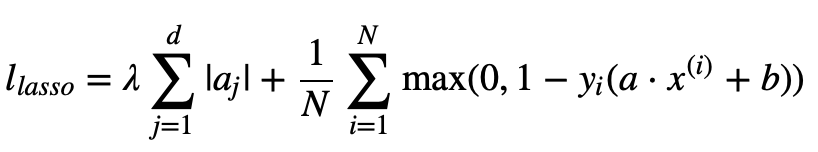

In [218]:
def loss_terms_lasso(e_batch, a, lam):
    """
    Computes the hinge and lasso regularization losses.
    
    Parameters
    ----------
    e_batch: A numpy array with the shape (N, 1), where N is the batch size. This is the output of the e_term function you wrote previously, and its kth element is e_k = 1 − y_k(a*x_k+b).
    a: A numpy array with the shape (d, 1), where d is the number of features. This is the weight vector.
    lam: A scalar representing the regularization coefficient 𝜆.
    
    Returns
    -------
    hinge_loss: The hinge loss scalar as defined in the cell above.
    lasso_loss: The lasso loss scalar as defined in the cell above.
    """
    
    # your code here
#     raise NotImplementedError
    
    hinge_loss = e_batch
    hinge_loss[hinge_loss < 0] = 0
    hinge_loss = hinge_loss.mean()
    
    lasso_loss = lam * np.absolute(a).sum()
    
    return np.array((hinge_loss, lasso_loss))

In [219]:
# Performing sanity checks on your implementation
e_batch_ = ((np.arange(35).reshape(-1,1) ** 13) % 20) / 7.
a_ = (np.arange(7)* 0.2).reshape(-1,1)
lam_ = 10.

hinge_loss_1, reg_loss_1 = tuple(loss_terms_lasso(e_batch_, a_, lam_))
assert np.round(hinge_loss_1,3) == 1.114 and np.round(reg_loss_1,3) == 42.0, np.round(reg_loss_1,3)

hinge_loss_2, reg_loss_2 = tuple(loss_terms_lasso(e_batch_-1., a_, lam_))
assert np.round(hinge_loss_2,3) == 0.412 and np.round(reg_loss_2,3) == 42.0, np.round(reg_loss_2,3)

In a similar fashion, the Lasso-regularized subgradient can be reproduced.

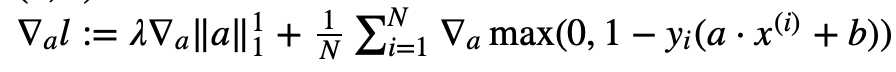

The Lasso subgradient can be computed as follows:

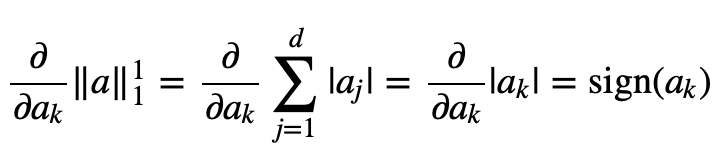

Where the scalar function can be computed as follows:

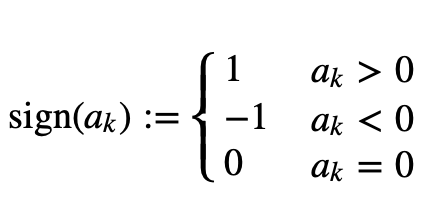

Since the gradients are the partial derivative vectors for each dimension, the subgradient can be defined as follows:

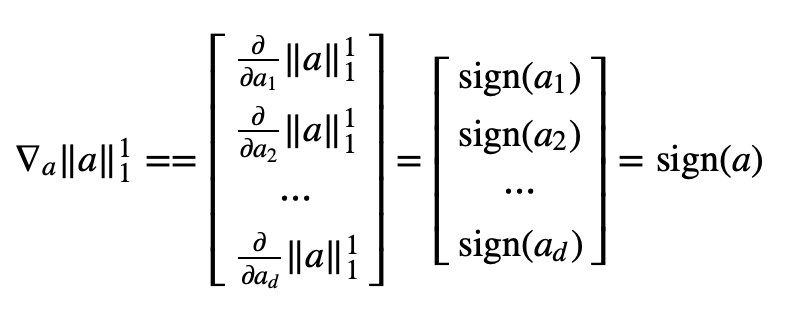

In [220]:
def a_gradient_lasso(x_batch, y_batch, e_batch, a, lam):
    """
    Computes the lasso-regularized loss sub-gradient w.r.t the weights vector
    
    Parameters
    ----------
    x_batch: A numpy array with the shape (N, d), where d is the number of features and N is the batch size.
    y_batch: A numpy array with the shape (N, 1), where N is the batch size.
    e_batch: A numpy array with the shape (N, 1), where N is the batch size. This is the output of the e_term function you wrote previously, and its kth element is e_k = 1 − y_k(a*x_k+b).
    a: A numpy array with the shape (d, 1), where d is the number of features. This is the weight vector.
    lam: A scalar representing the regularization coefficient 𝜆.
    
    Returns
    -------
    grad_a: A numpy array with shape (d, 1) and defined as the gradient of the lasso-regularized loss function w.r.t the weights vector. 
    """
    
    # your code here
#     raise NotImplementedError
    
    """
    der_a = 1 - y * x
    
    x = N * d
    y = N * 1
    e = N * 1
    a =     d * 1
    l = 1
    --------------
        N * d * 1
    
    """
    
    
    N, d = x_batch.shape
    
    # c is an N x d matrix
    # a is a d x 1 vector
    # get the mean for c, and output is d vector --> add fake axis for broadcasting
    
    c_lasso = (np.where(e_batch>0, -y_batch * x_batch, np.zeros((N, d)))) # cost function
    grad_a = lam * np.sign(a) + c_lasso.mean(axis=0)[:,np.newaxis]
    
    return grad_a

In [221]:
# Performing sanity checks on implementation
x_batch_ = ((np.arange(35).reshape(5,7) ** 13) % 20) / 7.
y_batch_ = (2. * (np.arange(5)>2) - 1.).reshape(-1,1)
a_ = (np.arange(7)* 0.2).reshape(-1,1)
b_ = 0.1
lam_ = 10.
e_batch_ = e_term(x_batch_, y_batch_, a_, b_)

grad_a_lasso_ = a_gradient_lasso(x_batch_, y_batch_, e_batch_, a_, lam_)

assert np.array_equal(grad_a_lasso_.round(3), np.array([[ 0.314], [10.686], [11.057],[10.571], [10.657], [11.029], [10.829]]))

### Training the SVM Model

In [233]:
def get_acc(a, b, feats_nomalized, labels):
    pred = (feats_nomalized @ a + b) >= 0.
    pred = 2 * pred - 1
    acc = (pred.reshape(-1) == labels.reshape(-1)).mean()
    return acc

def svm_trainer(train_features, train_labels, val_features, val_labels, heldout_size=50,
                batch_size=1, num_epochs=100, num_steps=300, eval_interval = 30, 
                lambda_list=[1e-3, 1e-2, 1e-1, 2e-1], eta_tuner=lambda epoch: 1./(0.01 * epoch + 500.),
                regularization = 'ridge'):

    train_features_normalized = normalize_feats(train_features, train_features)
    val_features_normalized = normalize_feats(train_features, val_features)

    np_random = np.random.RandomState(12345)
    if regularization == 'ridge':
        a_gradient = a_gradient_ridge
        loss_terms = loss_terms_ridge
    elif regularization == 'lasso':
        a_gradient = a_gradient_lasso
        loss_terms = loss_terms_lasso
    else:
        raise Exception(f'Unknown regularization {regularization}')
    
    train_progress = np.arange(0., num_epochs, eval_interval/num_steps)
    heldout_accs = np.zeros((len(lambda_list), train_progress.size))
    weight_magnitudes = np.zeros((len(lambda_list), train_progress.size))
    hinge_losses = np.zeros((len(lambda_list), train_progress.size))
    reg_losses = np.zeros((len(lambda_list), train_progress.size))
    val_accs = np.zeros(len(lambda_list))

    all_a = np.zeros((len(lambda_list), train_features_normalized.shape[1]))
    all_b = np.zeros(len(lambda_list))

    for lam_idx, lam in enumerate(lambda_list):
        a = np.zeros((train_features_normalized.shape[1], 1))
        b = 0.

        eval_idx = 0
        for epoch in range(num_epochs):
            eta = eta_tuner(epoch)

            # Picking the heldout indices
            # We will avoid the use of np_random.choice due to performance reasons
            heldout_size = min(heldout_size, train_features_normalized.shape[0]//2)
            
            heldout_indicator = np.arange(train_features_normalized.shape[0]) < heldout_size
            np_random.shuffle(heldout_indicator)

            heldout_feats = train_features_normalized[heldout_indicator,:]
            heldout_labels = train_labels[heldout_indicator]

            non_heldout_feats = train_features_normalized[heldout_indicator==False,:]
            non_heldout_labels = train_labels[heldout_indicator==False]
            
            batch_size = min(batch_size, non_heldout_feats.shape[0])

            for step in range(num_steps):
                rand_unifs = np_random.uniform(0, 1, size=non_heldout_feats.shape[0])
                batch_thresh = np.percentile(rand_unifs, 100. * batch_size / non_heldout_feats.shape[0])
                batch_indices = (rand_unifs<=batch_thresh)
                x_batch = non_heldout_feats[batch_indices,:]
                y_batch = non_heldout_labels[batch_indices].reshape(-1,1)

                e_batch = e_term(x_batch, y_batch, a, b)
                hinge_loss, reg_loss = loss_terms(e_batch, a, lam)
                grad_a = a_gradient(x_batch, y_batch, e_batch, a, lam)
                grad_b = b_derivative(y_batch, e_batch)

                if step % eval_interval == 0:
                    heldout_acc = get_acc(a, b, heldout_feats, heldout_labels)
                    heldout_accs[lam_idx, eval_idx] = heldout_acc
                    if regularization == 'ridge':
                        weight_magnitudes[lam_idx, eval_idx] = np.sum(a**2)
                    elif regularization == 'lasso':
                        weight_magnitudes[lam_idx, eval_idx] = np.sum(np.abs(a))
                    hinge_losses[lam_idx, eval_idx] = hinge_loss
                    reg_losses[lam_idx, eval_idx] = reg_loss
                    eval_idx += 1
                    if step % (5 * eval_interval) == 0:
                        print('.', end='')

                a = a - eta * grad_a
                b = b - eta * grad_b
        
        val_acc = get_acc(a, b, val_features_normalized, val_labels)
        val_accs[lam_idx] = val_acc
        all_a[lam_idx, :] = a.reshape(-1)
        all_b[lam_idx] = b
        print((f'\nlambda={lam} yielded a validation accuracy of %.3f '%(100. * val_acc)) + '%') 
        
    return_dict = dict(all_a=all_a, all_b=all_b, train_progress=train_progress, regularization=regularization,
                       train_features=train_features, train_labels=train_labels, 
                       val_features=val_features, val_labels=val_labels,
                       lambda_list=lambda_list, val_accs=val_accs, hinge_losses=hinge_losses,
                       weight_magnitudes=weight_magnitudes, heldout_accs=heldout_accs)
    return return_dict

def get_test_accuracy(test_features, test_labels, training_info):
    train_features = training_info['train_features']
    val_accs = training_info['val_accs']
    all_a = training_info['all_a']
    all_b = training_info['all_b']
    lambda_list = training_info['lambda_list']
    test_features_normalized = normalize_feats(train_features, test_features)
    best_lam_idx = np.argmax(val_accs)
    best_a = all_a[best_lam_idx, :].reshape(-1,1)
    best_b = all_b[best_lam_idx]
    test_acc = get_acc(best_a, best_b, test_features_normalized, test_labels)
    print(f'Best lambda was chosen to be {lambda_list[best_lam_idx]}')
    print((f'The resulting test accuracy was %.3f '%(100. * test_acc)) + '%')

def print_weights(training_info, rounding=20):
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    pd.set_option("display.precision", rounding)
    print('Here are the learned weights for each regularization coefficient:')
    print('  * Each row represents a single regularization coefficient.')
    print('  * The last two columns represent the weight vector magnitudes.')
    print('  * Each of the other columns represent a feature weight. ')
    all_a = training_info['all_a']
    lambda_list = training_info['lambda_list']
    all_a_rounded = all_a.round(rounding)
    w_df = pd.DataFrame(all_a_rounded, columns=['$a_{%d}$'%(col+1) for col in range(all_a.shape[1])])
    
    if all_a.shape[1] > 7:
        w_df = w_df.drop(w_df.columns[8:(all_a.shape[1]-3)], axis=1)
        w_df.insert(8, '$\cdots$', ['$\cdots$' for _ in lambda_list])
        
    w_df.insert(0, '$\lambda$', lambda_list)
    w_df['$\|a\|_2^2$'] = np.sum(all_a**2, axis=1).round(rounding)
    w_df['$\|a\|_1^1$'] = np.sum(np.abs(all_a), axis=1).round(rounding)
    max_l_norm = w_df[['$\|a\|_2^2$', '$\|a\|_1^1$']].values.max(axis=1)
    w_df.reset_index(drop=True, inplace=True)
    w_df = w_df.set_index('$\lambda$')  
    w_df_style = w_df.style.apply(lambda x: ['font-weight: bold' if v in max_l_norm else '' for v in x])
    return w_df_style

### Training Plots

In [234]:
def ema(vec, alpha=0.99):
    # Exponential Moving Average Filter
    # This filter is useful for smoothing noisy training statistics such as the (stochastic) loss.
    # alpha is the smoothing factor; larger smoothing factors can remove more noise, 
    # but will induce more delay when following the original signal.
    out = [vec[0]]
    last_val = vec[0]
    for val in vec[1:]:
        last_val = val*(1-alpha) + alpha*last_val
        out.append(last_val)
    return np.array(out)
    
def generate_plots(training_info, heldout_acc_smoothing=0.99, loss_smoothing=0.99, weight_smoothing=0.99):
    assert 0 <= heldout_acc_smoothing < 1
    assert 0 <= loss_smoothing < 1
    assert 0 <= weight_smoothing < 1
    all_a = training_info['all_a']
    all_b = training_info['all_b']
    train_progress = training_info['train_progress']
    lambda_list = training_info['lambda_list']
    val_accs = training_info['val_accs']
    hinge_losses = training_info['hinge_losses']
    weight_magnitudes = training_info['weight_magnitudes']
    heldout_accs = training_info['heldout_accs']
    regularization = training_info['regularization']
    
    fig, axes = plt.subplots(2, 2, figsize=(12,10), dpi=90)
    ax = axes[0,0]
    for lam_idx, lam in enumerate(lambda_list):
        ax.plot(train_progress, ema(weight_magnitudes[lam_idx,:], weight_smoothing), label=f'lambda={lam}')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Weight Magnitude')
    if weight_smoothing:
        ax.set_title('(Moving Average of) Weight Magnitudes During Training')
    else:
        ax.set_title('Weight Magnitudes During Training')
    
    ax.legend()

    ax = axes[0,1]
    for lam_idx, lam in enumerate(lambda_list):
        ax.plot(train_progress, ema(heldout_accs[lam_idx,:], heldout_acc_smoothing), label=f'lambda={lam}')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Held-out Accuracy')
    if heldout_acc_smoothing:
        ax.set_title('(Moving Average of) Held-out Accuracy During Training')
    else:
        ax.set_title('Held-out Accuracy During Training')
    _ = ax.legend()
    
    ax = axes[1,0]
    ax.plot(lambda_list, val_accs)
    ax.set_xscale('log')
    ax.set_xlabel('Regularization coefficient')
    ax.set_ylabel('Validation Accuracy')
    _ = ax.set_title('Validation Accuracy')
    
    ax = axes[1,1]
    for lam_idx, lam in enumerate(lambda_list):
        ax.plot(train_progress, ema(hinge_losses[lam_idx,:], loss_smoothing), label=f'lambda={lam}')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    if loss_smoothing:
        ax.set_title('(Moving Average of) Hinge Loss During Training')
    else:
        ax.set_title('Hinge Loss During Training')
    _ = ax.legend()

Data Pre-proessing

In [235]:
df = df_draft.copy(deep=True)
df = df_draft.dropna()

label_col_name = 'class'
feature_col_names = [col for col in df.columns.tolist() if col!=label_col_name]

class_names = df[label_col_name].unique().tolist()
assert len(class_names) == 2
df[label_col_name] = 2. * np.array([class_names.index(x) for x in df[label_col_name]]) - 1.

df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,-1.0
1,4.54590,8.1674,-2.4586,-1.46210,-1.0
2,3.86600,-2.6383,1.9242,0.10645,-1.0
3,3.45660,9.5228,-4.0112,-3.59440,-1.0
4,0.32924,-4.4552,4.5718,-0.98880,-1.0


In [236]:
np_random = np.random.RandomState(12345)
# Splitting the data
df_shuffled = df.sample(frac=1, random_state=np_random).reset_index(drop=True)
all_features = df_shuffled.loc[:, df_shuffled.columns != label_col_name].values
all_labels = df_shuffled[label_col_name].values

valid_cols = []
for col_idx in range(all_features.shape[1]):
    if np.unique(all_features[:,col_idx].reshape(-1)).size > 5:
        valid_cols.append(col_idx)
all_features = all_features[:, valid_cols]

In [237]:
def train_val_test_split(all_features, all_labels, train_frac=0.4, val_frac=0.3):
    assert train_frac + val_frac <= 1
    assert train_frac > 0
    assert val_frac > 0
    train_cnt = int(train_frac * all_features.shape[0])
    val_cnt = int(val_frac * all_features.shape[0])
    train_features, train_labels = all_features[:train_cnt, :], all_labels[:train_cnt]
    val_features, val_labels = all_features[train_cnt:(train_cnt+val_cnt), :], all_labels[train_cnt:(train_cnt+val_cnt)]
    test_features, test_labels = all_features[(train_cnt+val_cnt):, :], all_labels[(train_cnt+val_cnt):]
    return train_features, train_labels, val_features, val_labels, test_features, test_labels

In [238]:
splitted_data = train_val_test_split(all_features, all_labels, train_frac=0.4, val_frac=0.3)
train_features, train_labels, val_features, val_labels, test_features, test_labels = splitted_data

train_features.shape, train_labels.shape, val_features.shape, val_labels.shape, test_features.shape, test_labels.shape

((548, 4), (548,), (411, 4), (411,), (413, 4), (413,))

In [239]:
print(f'Negative Samples = {np.sum(all_labels==-1)} --> %.2f' %(100 * np.mean(all_labels==-1)) + "% of total samples")
print(f'Positive Samples = {np.sum(all_labels==1)} --> %.2f' %(100 * np.mean(all_labels==1)) + '% of total samples')

Negative Samples = 762 --> 55.54% of total samples
Positive Samples = 610 --> 44.46% of total samples


Training & Testing 
Ridge Regularization

In [241]:
splitted_data = train_val_test_split(all_features, all_labels, train_frac=0.5, val_frac=0.25)
    
# The "_pr" variable postfix is short for "plain ridge".
train_features_pr, train_labels_pr, val_features_pr, val_labels_pr, test_features_pr, test_labels_pr = splitted_data
    
training_info_plain_ridge = svm_trainer(train_features_pr, train_labels_pr, val_features_pr, val_labels_pr, 
                                            heldout_size=50, batch_size=32, num_epochs=50, num_steps=300, 
                                            eval_interval = 30, eta_tuner = lambda epoch: 1./(0.01 * epoch + 50.),
                                            lambda_list=[0., 1e-3, 1e-2, 1e-1, 1e0], 
                                            regularization='ridge')

....................................................................................................
lambda=0.0 yielded a validation accuracy of 98.542 %
....................................................................................................
lambda=0.001 yielded a validation accuracy of 98.542 %
....................................................................................................
lambda=0.01 yielded a validation accuracy of 98.542 %
....................................................................................................
lambda=0.1 yielded a validation accuracy of 97.959 %
....................................................................................................
lambda=1.0 yielded a validation accuracy of 89.504 %


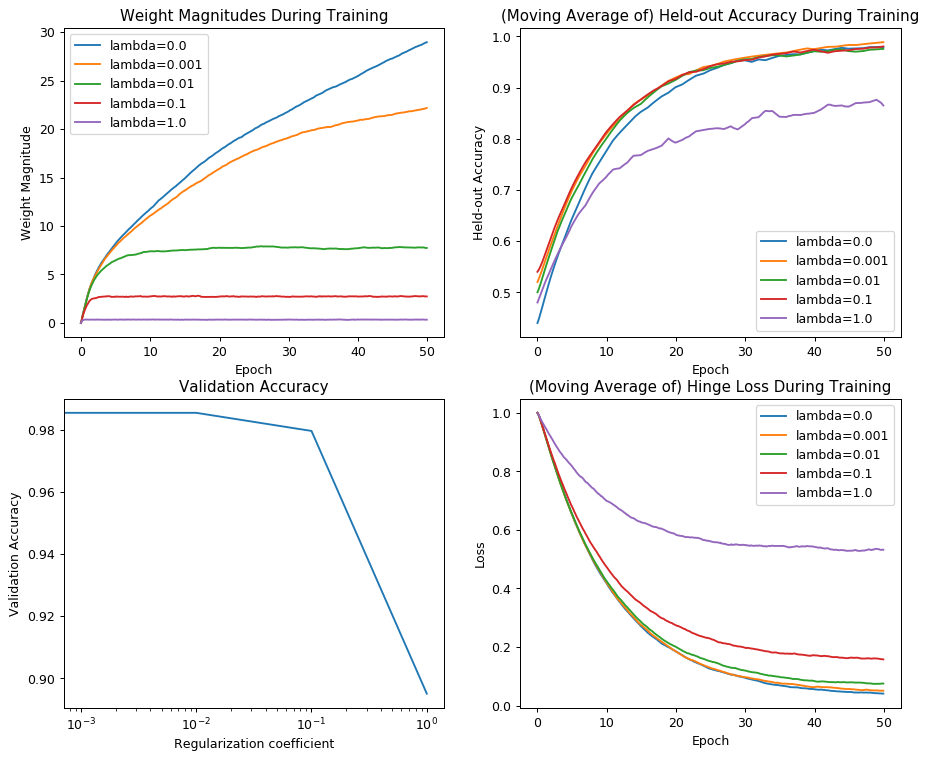

In [242]:
# The noise in the plots were smoothed-out by an exponential moving average filter.
# If you'd rather see the original plots, you can see the disable noise removal smoothing filters 
# for each subplot by setting the corresponding smoothing factor to zero.
generate_plots(training_info_plain_ridge, heldout_acc_smoothing=0.99, loss_smoothing=0.99, weight_smoothing=0.)

In [244]:
w_df = None
w_df = print_weights(training_info_plain_ridge, rounding=4)
w_df

Here are the learned weights for each regularization coefficient:
  * Each row represents a single regularization coefficient.
  * The last two columns represent the weight vector magnitudes.
  * Each of the other columns represent a feature weight. 


,$a_{1}$,$a_{2}$,$a_{3}$,$a_{4}$,$\|a\|_2^2$,$\|a\|_1^1$
$\lambda$,,,,,,
0.0,-2.833,-3.422,-3.039,0.055,28.98,9.349
0.001,-2.512,-2.979,-2.644,0.0477,22.18,8.183
0.01,-1.649,-1.615,-1.548,0.0941,7.733,4.906
0.1,-1.123,-0.87,-0.8399,0.1007,2.733,2.933
1.0,-0.5336,-0.2482,-0.0166,-0.0303,0.3475,0.8287


In [245]:
get_test_accuracy(test_features_pr, test_labels_pr, training_info_plain_ridge)

Best lambda was chosen to be 0.0
The resulting test accuracy was 98.251 %


Lasso Regularization

In [246]:
splitted_data = train_val_test_split(all_features, all_labels, train_frac=0.5, val_frac=0.25)
    
# The "_pl" variable postfix is short for "plain lasso".
train_features_pl, train_labels_pl, val_features_pl, val_labels_pl, test_features_pl, test_labels_pl = splitted_data
    
training_info_plain_lasso = svm_trainer(train_features_pl, train_labels_pl, val_features_pl, val_labels_pl, 
                                        heldout_size=50,batch_size=32, num_epochs=50, num_steps=300, 
                                        eval_interval = 30, eta_tuner = lambda epoch: 1./(0.01 * epoch + 50.),
                                        lambda_list=[0., 1e-3, 1e-2, 1e-1, 1e0], 
                                        regularization='lasso')

....................................................................................................
lambda=0.0 yielded a validation accuracy of 98.542 %
....................................................................................................
lambda=0.001 yielded a validation accuracy of 98.542 %
....................................................................................................
lambda=0.01 yielded a validation accuracy of 98.542 %
....................................................................................................
lambda=0.1 yielded a validation accuracy of 97.959 %
....................................................................................................
lambda=1.0 yielded a validation accuracy of 55.394 %


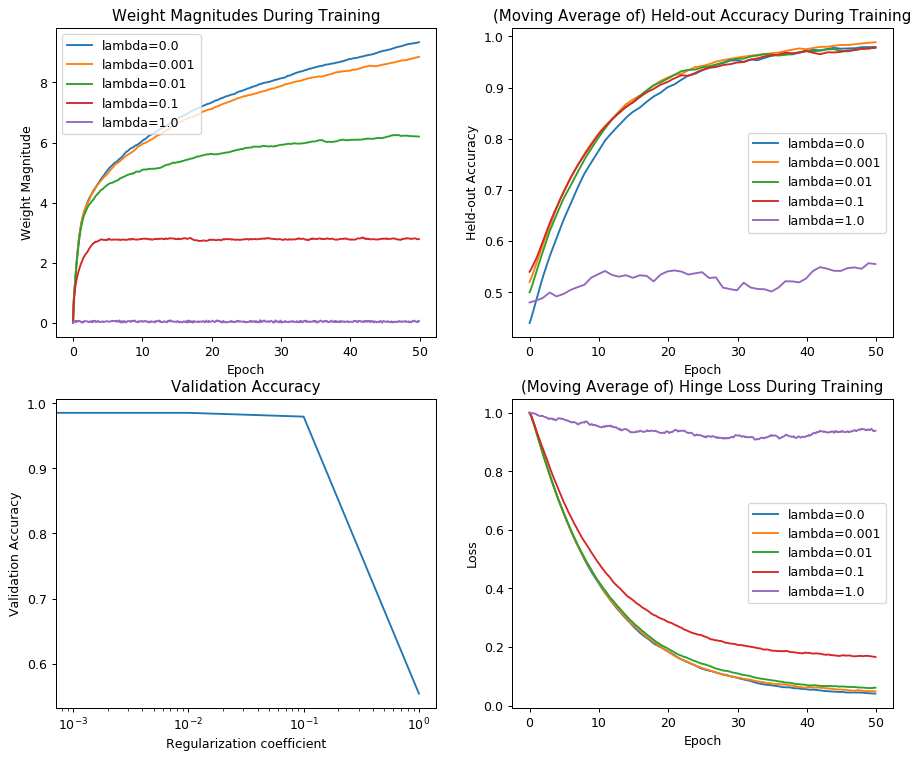

In [247]:
generate_plots(training_info_plain_lasso, heldout_acc_smoothing=0.99, loss_smoothing=0.99, weight_smoothing=0.)

In [248]:
get_test_accuracy(test_features_pl, test_labels_pl, training_info_plain_lasso)

Best lambda was chosen to be 0.0
The resulting test accuracy was 98.251 %


In [249]:
w_df = None
w_df = print_weights(training_info_plain_lasso, rounding=4)
w_df

Here are the learned weights for each regularization coefficient:
  * Each row represents a single regularization coefficient.
  * The last two columns represent the weight vector magnitudes.
  * Each of the other columns represent a feature weight. 


,$a_{1}$,$a_{2}$,$a_{3}$,$a_{4}$,$\|a\|_2^2$,$\|a\|_1^1$
$\lambda$,,,,,,
0.0,-2.833,-3.422,-3.039,0.055,28.98,9.349
0.001,-2.706,-3.245,-2.896,0.0083,26.24,8.855
0.01,-1.868,-2.3,-2.016,0.0259,12.85,6.21
0.1,-1.093,-0.8842,-0.8062,-0.0016,2.626,2.785
1.0,-0.026,0.0077,0.015,-0.0076,0.001,0.0563


Ridge Regularization with Noise

In [250]:
all_features_noised = np.concatenate([all_features, np_random.randn(all_features.shape[0], 5000)], axis=1)
    
splitted_data = train_val_test_split(all_features_noised, all_labels, train_frac=0.5, val_frac=0.25)
    
# The "_nr" variable postfix is short for "noisy ridge".
train_features_nr, train_labels_nr, val_features_nr, val_labels_nr, test_features_nr, test_labels_nr = splitted_data
    
training_info_noisy_ridge = svm_trainer(train_features_nr, train_labels_nr, val_features_nr, val_labels_nr,
                                        batch_size=32, num_epochs=50, num_steps=300, eval_interval=30, 
                                        eta_tuner = lambda epoch: 1./(0.2 * epoch + 1000.),
                                        lambda_list = [0., 1e-3, 1e-2, 1e-1, 1e0], 
                                        regularization='ridge')

....................................................................................................
lambda=0.0 yielded a validation accuracy of 60.350 %
....................................................................................................
lambda=0.001 yielded a validation accuracy of 60.641 %
....................................................................................................
lambda=0.01 yielded a validation accuracy of 61.224 %
....................................................................................................
lambda=0.1 yielded a validation accuracy of 60.350 %
....................................................................................................
lambda=1.0 yielded a validation accuracy of 60.350 %


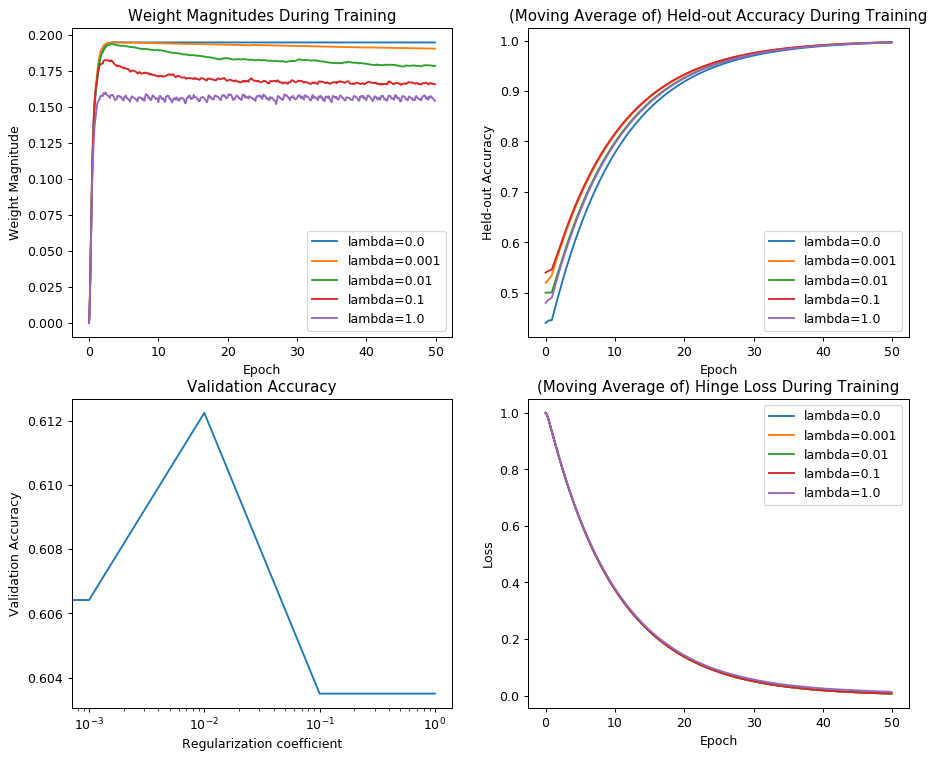

In [251]:
generate_plots(training_info_noisy_ridge, heldout_acc_smoothing=0.99, loss_smoothing=0.99, weight_smoothing=0.)

In [252]:
w_df = None
w_df = print_weights(training_info_noisy_ridge, rounding=4)
print('  * The non-noise features are the first four features.')
w_df

Here are the learned weights for each regularization coefficient:
  * Each row represents a single regularization coefficient.
  * The last two columns represent the weight vector magnitudes.
  * Each of the other columns represent a feature weight. 
  * The non-noise features are the first four features.


,$a_{1}$,$a_{2}$,$a_{3}$,$a_{4}$,$a_{5}$,$a_{6}$,$a_{7}$,$a_{8}$,$\cdots$,$a_{5002}$,$a_{5003}$,$a_{5004}$,$\|a\|_2^2$,$\|a\|_1^1$
$\lambda$,,,,,,,,,,,,,,
0.0,-0.1141,-0.0634,0.0138,-0.0015,0.0061,0.0015,-0.0077,-0.0206,$\cdots$,0.0006,0.0047,0.0026,0.1949,23.72
0.001,-0.1128,-0.0622,0.0136,-0.0014,0.006,0.0021,-0.0073,-0.0199,$\cdots$,-0.0008,0.0062,0.0021,0.1905,23.45
0.01,-0.1089,-0.0598,0.0124,-0.0016,0.0061,0.0015,-0.0081,-0.0204,$\cdots$,-0.0001,0.0061,0.002,0.1787,22.73
0.1,-0.105,-0.0566,0.0102,-0.0021,0.006,0.0014,-0.0068,-0.0186,$\cdots$,-0.0008,0.0058,0.0021,0.1655,21.87
1.0,-0.1017,-0.0547,0.0103,-0.0024,0.0055,0.0018,-0.0067,-0.0178,$\cdots$,-0.0009,0.0056,0.0019,0.154,21.1


In [253]:
get_test_accuracy(test_features_nr, test_labels_nr, training_info_noisy_ridge)

Best lambda was chosen to be 0.01
The resulting test accuracy was 63.265 %


Lasso Regularization with Noise

In [254]:
all_features_noised = np.concatenate([all_features, np_random.randn(all_features.shape[0], 5000)], axis=1)
    
splitted_data = train_val_test_split(all_features_noised, all_labels, train_frac=0.5, val_frac=0.25)
    
# The "_nl" variable postfix is short for "noisy lasso".
train_features_nl, train_labels_nl, val_features_nl, val_labels_nl, test_features_nl, test_labels_nl = splitted_data
    
training_info_noisy_lasso = svm_trainer(train_features_nl, train_labels_nl, val_features_nl, val_labels_nl,
                                        batch_size=32, num_epochs=50, num_steps=300, eval_interval=30, 
                                        eta_tuner = lambda epoch: 1./(0.2 * epoch + 1000.),
                                        lambda_list = [0., 1e-3, 1e-2, 1e-1, 1e0], 
                                        regularization='lasso')

....................................................................................................
lambda=0.0 yielded a validation accuracy of 58.892 %
....................................................................................................
lambda=0.001 yielded a validation accuracy of 69.096 %
....................................................................................................
lambda=0.01 yielded a validation accuracy of 87.755 %
....................................................................................................
lambda=0.1 yielded a validation accuracy of 97.376 %
....................................................................................................
lambda=1.0 yielded a validation accuracy of 55.394 %


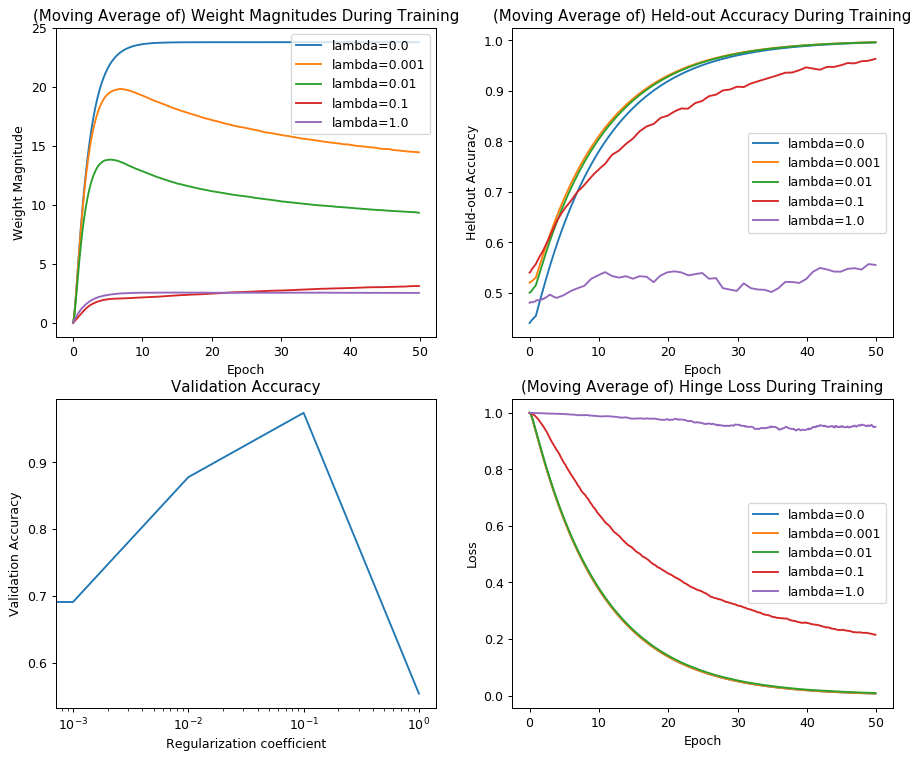

In [255]:
generate_plots(training_info_noisy_lasso, heldout_acc_smoothing=0.99, loss_smoothing=0.99, weight_smoothing=0.95)

In [256]:
w_df = None
w_df = print_weights(training_info_noisy_lasso, rounding=4)
print('  * The non-noise features are the first four features.')
w_df

Here are the learned weights for each regularization coefficient:
  * Each row represents a single regularization coefficient.
  * The last two columns represent the weight vector magnitudes.
  * Each of the other columns represent a feature weight. 
  * The non-noise features are the first four features.


,$a_{1}$,$a_{2}$,$a_{3}$,$a_{4}$,$a_{5}$,$a_{6}$,$a_{7}$,$a_{8}$,$\cdots$,$a_{5002}$,$a_{5003}$,$a_{5004}$,$\|a\|_2^2$,$\|a\|_1^1$
$\lambda$,,,,,,,,,,,,,,
0.0,-0.1135,-0.0634,0.015,-0.0008,0.0055,-0.002,-0.003,-0.0032,$\cdots$,-0.001,-0.0108,0.0117,0.1924,23.81
0.001,-0.2389,-0.1264,-0.0037,0,0.0005,-0,0.0004,-0.0001,$\cdots$,0.0003,-0.012,0.0134,0.2297,14.23
0.01,-0.6694,-0.4016,-0.2353,0.003,0.0004,0.0004,0.0005,0,$\cdots$,-0.0001,-0.0114,-0.0001,0.8092,9.246
0.1,-1.047,-0.7828,-0.6585,-0.0001,0.0002,0,0.0005,-0,$\cdots$,-0.0001,-0.0002,0,2.142,3.168
1.0,-0.0006,-0,0.0004,0.001,0.0009,-0.0006,-0.0003,0.0007,$\cdots$,0.0004,0.0007,0.0005,0.0018,2.564


In [257]:
get_test_accuracy(test_features_nl, test_labels_nl, training_info_noisy_lasso)

Best lambda was chosen to be 0.1
The resulting test accuracy was 96.793 %
